<a href="https://www.kaggle.com/code/rintasetyon/possum-regression-randomforest-gradientboosting?scriptVersionId=185585916" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openintro-possum/possum.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Memuat dataset
data = pd.read_csv('/kaggle/input/openintro-possum/possum.csv')

In [3]:
# Mengganti nama kolom untuk kemudahan
data.columns = ['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

# Mengubah kolom 'sex' menjadi numerik
data['sex'] = data['sex'].map({'m': 1, 'f': 0})

# Memeriksa nilai unik dalam kolom 'sex'
print("Nilai unik dalam kolom 'sex':", data['sex'].unique())

# Menghapus baris dengan nilai tak terduga di kolom 'sex'
data = data[data['sex'].isin([0, 1])]

Nilai unik dalam kolom 'sex': [1 0]


In [4]:

# Mengisi nilai yang hilang untuk kolom numerik saja
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [5]:

# Standarisasi fitur numerik
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Menghitung matriks korelasi hanya untuk kolom numerik
corr_matrix = data[numeric_columns].corr()
print(corr_matrix['age'].sort_values(ascending=False))
print(corr_matrix['sex'].sort_values(ascending=False))


age         1.000000
belly       0.345825
chest       0.325303
hdlngth     0.311848
skullw      0.279955
totlngth    0.250970
eye         0.234669
footlgth    0.125314
taill       0.117274
earconch    0.052943
sex        -0.063995
site       -0.130799
case       -0.194404
Name: age, dtype: float64
sex         1.000000
case        0.253980
site        0.232817
eye         0.188371
hdlngth     0.107200
skullw      0.080014
taill      -0.040917
age        -0.063995
belly      -0.090777
earconch   -0.091559
footlgth   -0.122964
chest      -0.139074
totlngth   -0.160200
Name: sex, dtype: float64


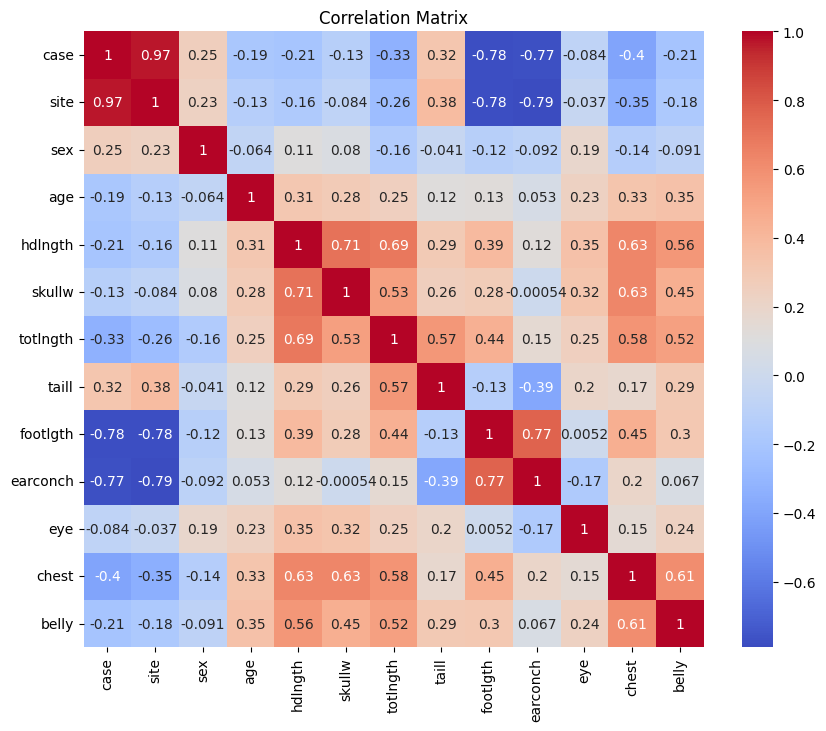

In [6]:

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Mean Squared Error: 0.5953786343799277


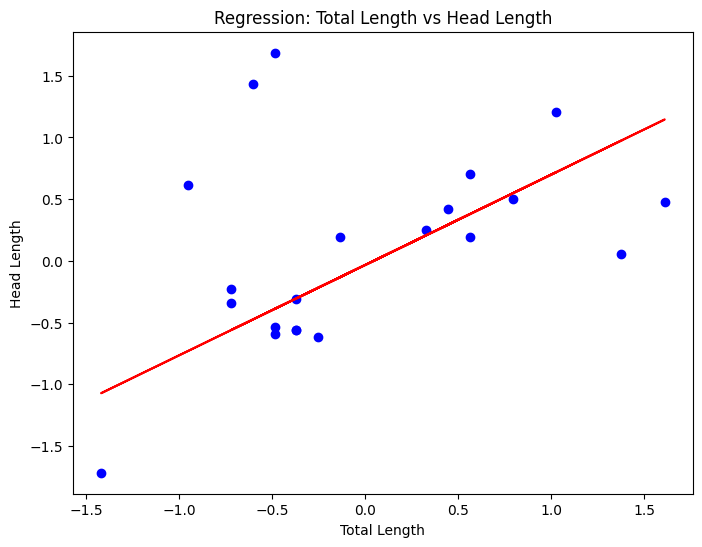

In [7]:

# Menggunakan total length untuk memprediksi panjang kepala possum
X = data[['totlngth']]
y = data['hdlngth']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Memprediksi pada testing set
y_pred = regressor.predict(X_test)

# Menghitung Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot hasil regresi
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Total Length')
plt.ylabel('Head Length')
plt.title('Regression: Total Length vs Head Length')
plt.show()


In [8]:

# Mengklasifikasikan jenis kelamin possum berdasarkan dimensi tubuh dan lokasi
X = data[['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'site']]
y = data['sex']

# Memastikan bahwa y adalah tipe integer
y = y.astype(int)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validasi tipe data y_train dan y_test
print(f'Tipe data y_train: {type(y_train)}')
print(f'Tipe data y_test: {type(y_test)}')
print(f'Tipe data elemen y_train: {type(y_train.iloc[0])}')



Tipe data y_train: <class 'pandas.core.series.Series'>
Tipe data y_test: <class 'pandas.core.series.Series'>
Tipe data elemen y_train: <class 'numpy.int64'>


In [9]:

# Hyperparameter Tuning untuk RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [10]:

# Model terbaik dari GridSearch
best_rf_classifier = grid_search.best_estimator_

# Memprediksi pada testing set
y_pred = best_rf_classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')


Random Forest Accuracy: 0.7142857142857143


In [11]:

# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menampilkan Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[ 3  5]
 [ 1 12]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.38      0.50         8
           0       0.71      0.92      0.80        13

    accuracy                           0.71        21
   macro avg       0.73      0.65      0.65        21
weighted avg       0.72      0.71      0.69        21



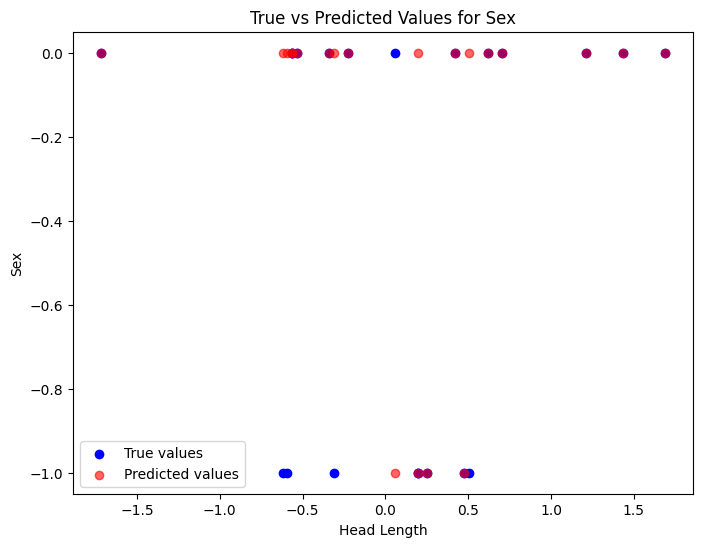

In [12]:
# Visualisasi hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(X_test['hdlngth'], y_test, color='blue', label='True values')
plt.scatter(X_test['hdlngth'], y_pred, color='red', alpha=0.6, label='Predicted values')
plt.xlabel('Head Length')
plt.ylabel('Sex')
plt.legend()
plt.title('True vs Predicted Values for Sex')
plt.show()


In [13]:
# Menampilkan hasil prediksi dalam tabel
results_df = X_test.copy()
results_df['True Sex'] = y_test
results_df['Predicted Sex'] = y_pred

# Menampilkan tabel
print("Hasil Prediksi dalam Tabel:")
print(results_df)

Hasil Prediksi dalam Tabel:
     hdlngth    skullw  totlngth     taill  footlgth  earconch       eye  \
30  0.055430 -0.898410  1.378053 -0.004931 -0.105500  1.068382 -0.522479   
65 -0.619461 -0.349744 -0.253734 -0.261331 -1.208229 -0.961168  0.625503   
64  0.252273  0.166648  0.329047  0.507870 -0.059553 -1.572478 -1.000805   
53  1.208369  1.974020  1.028384  3.071874  0.652626 -0.521025  2.347477   
45 -0.338257 -0.801587 -0.719959 -1.030532  0.997229  0.750501 -0.618144   
93 -0.225775  0.231197 -0.719959 -0.774132 -0.978493 -0.741096 -0.618144   
91 -0.535100 -0.188371 -0.486846 -0.004931 -0.197394 -0.325405 -0.522479   
47  1.686417  2.038569 -0.486846 -1.543333 -0.358208 -0.790001  1.869151   
10  0.196032  0.102099  0.562160  1.020671  2.008064  0.774953 -0.139818   
0   0.420996  1.134883  0.445603 -0.517732  1.387779  1.557431  0.147177   
18  0.505357 -0.478842  0.795272 -1.030532  1.135070  1.410716  0.147177   
31  0.477237 -0.059273  1.611166  1.020671  1.456699  0.9461

In [14]:

# Memprediksi lokasi penjebakan possum berdasarkan dimensi tubuh
X = data[['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
y = data['site']

# Memastikan bahwa y adalah tipe integer
y = y.astype(int)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning untuk GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [15]:

# Model terbaik dari GridSearch
best_gb_classifier = grid_search.best_estimator_

# Memprediksi pada testing set
y_pred = best_gb_classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy}')


Gradient Boosting Accuracy: 0.6666666666666666


In [16]:
# Menampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
